task 1:

In [1]:
import numpy as np
a = np.random.random((10, 3))
print(a)
print(a[np.arange(10), np.argmin(abs(a - 0.5), axis = 1)])

[[0.72094095 0.68934137 0.92153913]
 [0.70916267 0.77181462 0.93396345]
 [0.2110583  0.92328382 0.15946067]
 [0.85846958 0.51032957 0.4242974 ]
 [0.59738041 0.15091394 0.20428148]
 [0.02043702 0.11622563 0.22158805]
 [0.65853266 0.87547501 0.98716629]
 [0.84790349 0.75254442 0.47423499]
 [0.81040762 0.5050296  0.55699963]
 [0.48835001 0.87502419 0.72727017]]
[0.68934137 0.70916267 0.2110583  0.51032957 0.59738041 0.22158805
 0.65853266 0.47423499 0.5050296  0.48835001]


task 2:

In [2]:
a = np.random.random((6, 6))
print(a)
print(np.sum(a, axis = 1) / np.min(a, axis = 0))

[[0.22373188 0.17368691 0.12750323 0.59808112 0.21020307 0.10656493]
 [0.99017704 0.47500051 0.03848035 0.84156332 0.3904704  0.29631887]
 [0.84790529 0.04623049 0.74689407 0.06006536 0.16357808 0.78572855]
 [0.06004531 0.45232292 0.43658831 0.91714843 0.38435225 0.03399554]
 [0.88098612 0.78646464 0.62094805 0.24781276 0.30734738 0.71891631]
 [0.42306816 0.17871646 0.62850184 0.82014027 0.17842426 0.03411528]]
[23.97807803 65.58464858 68.87676152 38.03278246 21.7784385  66.56656379]


task 3:

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max(x[np.where(x[np.arange(len(x) - 1)] == 0)[0] + 1]))

5


task 4:

In [4]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength = len(x))[np.arange(len(x))]
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


task 5:

In [5]:
def kmeans(obs, k_or_guess, iter = 20, thresh = 1e-05):
    if(type(k_or_guess) == int):
        k = k_or_guess
        (M, N) = obs.shape
        if k >= M:
            res = np.zeros((k, N))
            res[np.arange(M)] = obs[np.arange(M)]
            return (res, 0)
        i = 0
        p = 1
        thresh_prev = thresh_curr = 0 
        num_of_cluster = np.zeros(M)
        best_dispersion = -1
        diff = thresh + 1
        t = np.arange(k)
        t.shape = ((k, 1))
        best_centroids = np.zeros((k, N))
        while(i < iter):
            if(p == 1):
                start_indices = np.sort(np.random.randint(0, M - k + 1, k)) + np.arange(k_or_guess)
                centroids = obs[start_indices]
                centroids.shape = (1, k, N)
                obs.shape = (M, 1, N)
                num_of_cluster = np.argmin(np.sum((obs - centroids) ** 2, axis = 2), axis = 1)
                centroids.shape = (k, N)
                obs.shape = (M, N)
                thresh_prev = np.mean(np.sum((obs - centroids[num_of_cluster]) ** 2, axis = 1))
                p = 0
            centroids.shape = (1, k, N)
            obs.shape = (M, 1, N)
            num_of_cluster = np.argmin(np.sum((obs - centroids) ** 2, axis = 2), axis = 1)
            centroids.shape = (k, N)
            obs.shape = (M, N)
            centroids_new = np.zeros((k, N))
            num_of_elem_in_cluster = np.zeros(k)
            for j in range(M):
                s = 0
                centroids_new[num_of_cluster[j]] += obs[j]
                num_of_elem_in_cluster[num_of_cluster[j]] += 1
            l = len(np.where(num_of_elem_in_cluster == 0)[0])
            if(l > 0):
                if(thresh_prev < best_dispersion or (best_dispersion <= -1 and best_dispersion >= -1)):
                    best_dispersion = thresh_prev
                    best_centroids = centroids
                i += 1
                continue
            centroids = centroids_new / num_of_elem_in_cluster.reshape((k, 1))
            thresh_curr = np.mean(np.sum((obs - centroids[num_of_cluster]) ** 2, axis = 1))
            diff = abs(thresh_curr - thresh_prev)
            if(diff <= thresh):
                diff = thresh + 1
                i += 1
                p = 1
                if(thresh_curr < best_dispersion or (best_dispersion <= -1 and best_dispersion >= -1)):
                    best_dispersion = thresh_curr
                    best_centroids = centroids   
            else:
                num_of_elem_in_cluster = np.zeros(k)
                centroids = np.zeros((k,N))
                for j in range(M):
                    centroids[num_of_cluster[j]] += obs[j]
                    num_of_elem_in_cluster[num_of_cluster[j]] += 1
                centroids /= num_of_elem_in_cluster.reshape((k, 1))
                thresh_prev = thresh_curr
        return (best_centroids, best_dispersion)

task 6:

In [6]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

In [7]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

In [8]:
def elbow_method(obs, max_k = 10, iter = 20, thresh = 1e-05):
    points = np.zeros((max_k, 2))
    for i in range(max_k):
        points[i] = np.array([float(i + 1), kmeans(obs, i + 1, iter, thresh)[1]])
    plt.scatter(points[:, 0], points[:, 1])
    plt.xlabel('K')
    plt.ylabel('Dispersion')
    plt.show()

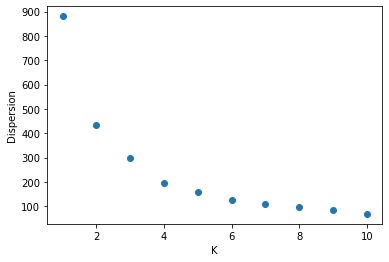

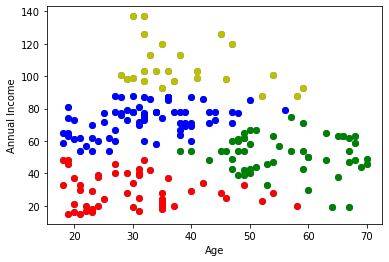

In [10]:
import matplotlib.pyplot as plt

a_ai = data[:, [2, 3]]
elbow_method(a_ai)

plt.scatter(data[:, 2], data[:, 3])
centroids = np.array(kmeans(a_ai, 4)[0])
(k, N) = centroids.shape
M = a_ai.shape[0]
centroids.shape = (1, k, N)
a_ai.shape = (M, 1, N)
num_of_cluster = np.argmin(np.sum((a_ai - centroids) ** 2, axis = 2), axis = 1)
a_ai.shape = (M, N)

colors = ['r', 'b', 'g', 'y']
labels = ['First group', 'Second group', 'Third group', 'Fourth group']
for i in range(4):
    arr = a_ai[np.where(num_of_cluster == i)]
    plt.scatter(*arr.T, c=colors[i], label = labels[i])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

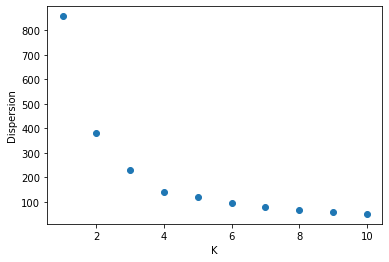

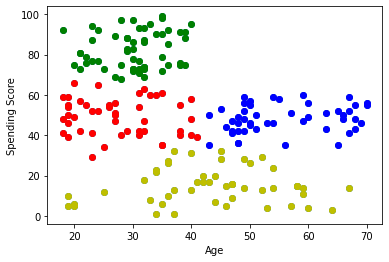

In [11]:
a_ss = data[:, [2, 4]]
elbow_method(a_ss)

plt.scatter(data[:, 2], data[:, 4])
centroids = np.array(kmeans(a_ss, 4)[0])
(k, N) = centroids.shape
M = a_ss.shape[0]
centroids.shape = (1, k, N)
a_ss.shape = (M, 1, N)
num_of_cluster = np.argmin(np.sum((a_ss - centroids) ** 2, axis = 2), axis = 1)
a_ss.shape = (M, N)

colors = ['r', 'b', 'g', 'y']
labels = ['First group', 'Second group', 'Third group', 'Fourth group']
for i in range(4):
    arr = a_ss[np.where(num_of_cluster == i)]
    plt.scatter(*arr.T, c=colors[i], label = labels[i])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

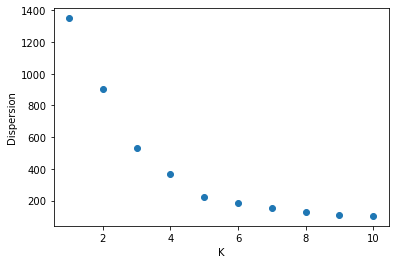

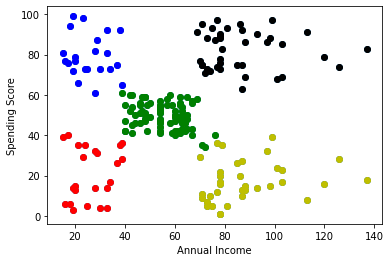

In [12]:
ai_ss = data[:, [3, 4]]
elbow_method(ai_ss)
plt.scatter(data[:, 3], data[:, 4])
centroids = np.array(kmeans(ai_ss, 5)[0])
(k, N) = centroids.shape
M = ai_ss.shape[0]
centroids.shape = (1, k, N)
ai_ss.shape = (M, 1, N)
num_of_cluster = np.argmin(np.sum((ai_ss - centroids) ** 2, axis = 2), axis = 1)
ai_ss.shape = (M, N)

colors = ['r', 'b', 'g', 'y', 'black']
labels = ['First group', 'Second group', 'Third group', 'Fourth group', 'Fifth group']
for i in range(5):
    arr = ai_ss[np.where(num_of_cluster == i)]
    plt.scatter(*arr.T, c=colors[i], label = labels[i])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()